<a href="https://colab.research.google.com/github/Muluken1Walle/Project-on-Bagging-and-Boosting-ensemble-model-/blob/main/Bagging_Boosting_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [100]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from scipy.stats import zscore
%matplotlib inline

In [101]:
#**1. Explore the dataset for anomalies and missing values and take corrective actions if necessary

In [102]:
data=pd.read_csv('/content/drive/MyDrive/Data_Scince/DS/Step 2-3 DT and Ensemble/03_Project/talking_data.csv')

In [103]:
data.head()

,ip,app,device,os,channel,click_time,attributed_time,is_attributed
0,87540,12,1,13,497,2017-11-07 09:30:38,NaN,0
1,105560,25,1,17,259,2017-11-07 13:40:27,NaN,0
2,101424,12,1,19,212,2017-11-07 18:05:24,NaN,0
3,94584,13,1,13,477,2017-11-07 04:58:08,NaN,0
4,68413,12,1,1,178,2017-11-09 09:00:09,NaN,0


In [104]:
data.isna().sum()

ip                     0
app                    0
device                 0
os                     0
channel                0
click_time             0
attributed_time    99773
is_attributed          0
dtype: int64

In [105]:
data.drop('attributed_time', axis=1, inplace=True)


In [106]:
data.isna().sum()

ip               0
app              0
device           0
os               0
channel          0
click_time       0
is_attributed    0
dtype: int64

In [107]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   ip             100000 non-null  int64 
 1   app            100000 non-null  int64 
 2   device         100000 non-null  int64 
 3   os             100000 non-null  int64 
 4   channel        100000 non-null  int64 
 5   click_time     100000 non-null  object
 6   is_attributed  100000 non-null  int64 
dtypes: int64(6), object(1)
memory usage: 5.3+ MB


In [108]:
#**2. Which column has maximum number of unique values present among all the available columns**
data.columns

Index(['ip', 'app', 'device', 'os', 'channel', 'click_time', 'is_attributed'], dtype='object')

In [109]:
feature=data.columns

In [110]:
for i in data.columns:
  print(data[i].name)
  print(data[i].unique())
  print('Number of unique values',len(data[i].unique()))

ip
[ 87540 105560 101424 ... 153487  34029 185961]
Number of unique values 34857
app
[ 12  25  13   3   1   9   2   6  20  14  64   7  15  18  11   8  23  21
  56  28  36  22  26  17  27  10  60  58  19  32  24   4  53 125 204   5
 202  70  47  29  55 103  35  83 208 146 161  46  62  65 110  42 150 266
 151 148  72 310  93  94  71  43  39 170  37  68  54 107 398 160  30 183
 315  45 121  38  82 134  33 233 100  44 109  59  74  61 104  66  67 273
 192  50 118 372  48 232 165  91 123  88 538  49  16 105 536 216 425 117
 551  99  86 101 394  78  95 181  76  34 124 548 108  85 145  79  97  75
  52 215  84  96  81 139 267  80 137 119 474 158 293 122 112 149 363 271
  31 171  87 168 176 347 163 190 486 133 302 268 407 116  92 115 261]
Number of unique values 161
device
[   1    2 3866    0 3032 3543    7   40  385   56 3282  103   16   21
   30    4   59   33  211   20    5  883  154  607  957   37  102  124
 2429   50  116   18  579  188   74  291   36 1482  347  160   25  486
  516   97  3

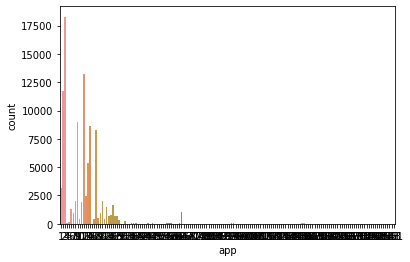

In [111]:
sns.countplot(data['app'])

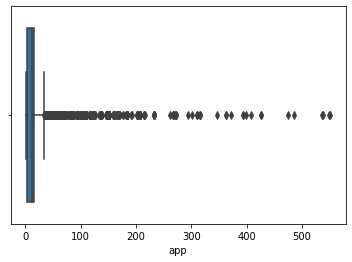

In [112]:
sns.boxplot(data['app'])

In [113]:
from numpy.lib.function_base import quantile
apps = data.groupby('app').size().reset_index(name='count')
apps = apps[apps['count'] > apps['count'].quantile(0.80)]
apps = apps.merge(data,on = 'app',how= 'inner')
apps.head()

,app,count,ip,device,os,channel,click_time,is_attributed
0,1,3135,17059,1,17,135,2017-11-09 01:17:58,0
1,1,3135,52432,1,13,115,2017-11-07 17:22:52,0
2,1,3135,89242,1,27,124,2017-11-07 09:37:21,0
3,1,3135,123994,1,19,101,2017-11-09 14:27:57,0
4,1,3135,34067,1,15,134,2017-11-07 15:06:06,0


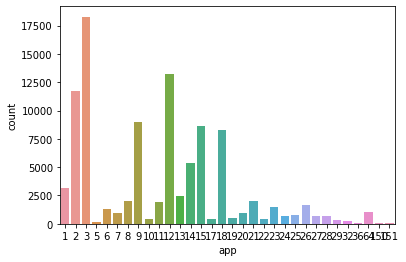

In [114]:
sns.countplot(apps['app'])

In [115]:
data.dtypes

ip                int64
app               int64
device            int64
os                int64
channel           int64
click_time       object
is_attributed     int64
dtype: object

In [116]:
data['day_of_week']= pd.to_datetime(data.click_time).dt.day_of_week

In [117]:
data['day_of_week']

0        1
1        1
2        1
3        1
4        3
        ..
99995    3
99996    1
99997    2
99998    2
99999    1
Name: day_of_week, Length: 100000, dtype: int64

In [118]:
data['day_of_year']= pd.to_datetime(data.click_time).dt.day_of_year
data['day_of_year']

0        311
1        311
2        311
3        311
4        313
        ... 
99995    313
99996    311
99997    312
99998    312
99999    311
Name: day_of_year, Length: 100000, dtype: int64

In [119]:
data['day_of_month']= pd.to_datetime(data.click_time).dt.month
data['day_of_month']

0        11
1        11
2        11
3        11
4        11
         ..
99995    11
99996    11
99997    11
99998    11
99999    11
Name: day_of_month, Length: 100000, dtype: int64

In [120]:
data['day_of_hour']= pd.to_datetime(data.click_time).dt.hour
data['day_of_hour']

0         9
1        13
2        18
3         4
4         9
         ..
99995    13
99996    11
99997    11
99998    17
99999    14
Name: day_of_hour, Length: 100000, dtype: int64

In [121]:
data.drop('click_time', axis=1, inplace=True)

In [122]:
data.columns

Index(['ip', 'app', 'device', 'os', 'channel', 'is_attributed', 'day_of_week',
       'day_of_year', 'day_of_month', 'day_of_hour'],
      dtype='object')

In [123]:
from sklearn.model_selection import train_test_split 
from sklearn import metrics
from sklearn import preprocessing
X_train = data.drop(['is_attributed'], axis=1)
y_train = data['is_attributed']
X_test = data.drop(['is_attributed'], axis=1)
y_tes= data['is_attributed']
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train , test_size=0.20, random_state=10)

In [124]:
print('Befor Oversampling count of label 1 ',sum(y_train==1))
print('Befor Oversampling count of label 0 ',sum(y_train==0))

Befor Oversampling count of label 1  188
Befor Oversampling count of label 0  79812


In [125]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_trains, y_trains = sm.fit_resample(X_train.values,y_train.ravel())

In [134]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_test, y_test = sm.fit_resample(X_test.values,y_test.ravel())

In [135]:
print('After Oversampling count of label 1 ',sum(y_trains==1))
print('After Oversampling count of label 0 ',sum(y_trains==0))

After Oversampling count of label 1  79812
After Oversampling count of label 0  79812


In [127]:
sum(y_tes==1)

227

In [128]:
from sklearn import datasets
from xgboost import XGBClassifier as xgb
xgb=xgb()
xgb.fit(X_trains,y_trains)

XGBClassifier()

In [136]:
pred=xgb.predict( X_test)
#predictions=[round(value) for value in y]

In [137]:
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
accuracy= accuracy_score(y_test,pred)
print('Accuracy is:',(accuracy*100))

Accuracy is: 94.81238414909072


In [138]:
confusion_matrix(y_test,pred)

array([[19244,   717],
       [ 1354, 18607]])

In [139]:
print(classification_report(pred,y_test))

              precision    recall  f1-score   support

           0       0.96      0.93      0.95     20598
           1       0.93      0.96      0.95     19324

    accuracy                           0.95     39922
   macro avg       0.95      0.95      0.95     39922
weighted avg       0.95      0.95      0.95     39922

